In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/phasor_julia`


In [2]:
include("src/spiking.jl")
include("src/vsa.jl")

similarity_outer (generic function with 2 methods)

In [3]:
using Plots

In [4]:
n_x = 101
n_y = 101
n_vsa = 1

1

In [5]:
repeats = 6

6

In [7]:
phase_x = reshape(range(-1.0, 1.0, n_x), (1, n_x, n_vsa)) |> collect
phase_y = reshape(range(-1.0, 1.0, n_y), (1, n_y, n_vsa)) |> collect

1×101×1 Array{Float64, 3}:
[:, :, 1] =
 -1.0  -0.98  -0.96  -0.94  -0.92  -0.9  …  0.9  0.92  0.94  0.96  0.98  1.0

In [11]:
sims = similarity_outer(phase_x, phase_y, 2)[1,1,:,:]

101×101 Matrix{Float64}:
 1.0       0.998027  0.992115  0.982287  …  0.992115  0.998027  1.0
 0.998027  1.0       0.998027  0.992115     0.982287  0.992115  0.998027
 0.992115  0.998027  1.0       0.998027     0.968583  0.982287  0.992115
 0.982287  0.992115  0.998027  1.0          0.951057  0.968583  0.982287
 0.968583  0.982287  0.992115  0.998027     0.929776  0.951057  0.968583
 0.951057  0.968583  0.982287  0.992115  …  0.904827  0.929776  0.951057
 0.929776  0.951057  0.968583  0.982287     0.876307  0.904827  0.929776
 0.904827  0.929776  0.951057  0.968583     0.844328  0.876307  0.904827
 0.876307  0.904827  0.929776  0.951057     0.809017  0.844328  0.876307
 0.844328  0.876307  0.904827  0.929776     0.770513  0.809017  0.844328
 ⋮                                       ⋱                      ⋮
 0.876307  0.844328  0.809017  0.770513     0.929776  0.904827  0.876307
 0.904827  0.876307  0.844328  0.809017     0.951057  0.929776  0.904827
 0.929776  0.904827  0.876307  0.84432

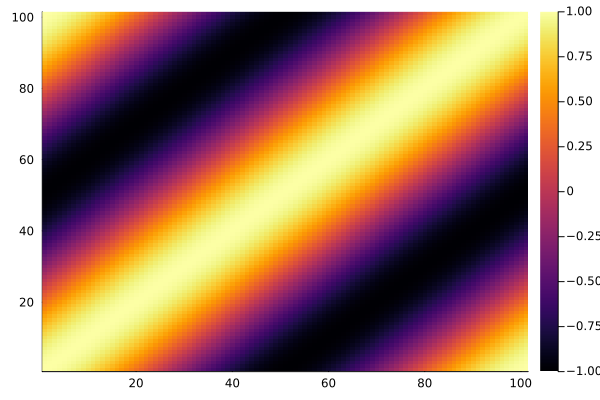

In [12]:
heatmap(sims)

In [14]:
spk_args = default_spk_args()

Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.02 (V)


In [15]:
tspan = (0.0, repeats*1.0)

(0.0, 6.0)

In [16]:
st_x = phase_to_train(phase_x, spk_args, repeats = repeats)
st_y = phase_to_train(phase_y, spk_args, repeats = repeats)

Spike Train: (1, 101, 1) with 606 spikes.

In [17]:
sims_2 = similarity_outer(st_x, st_y, 2);

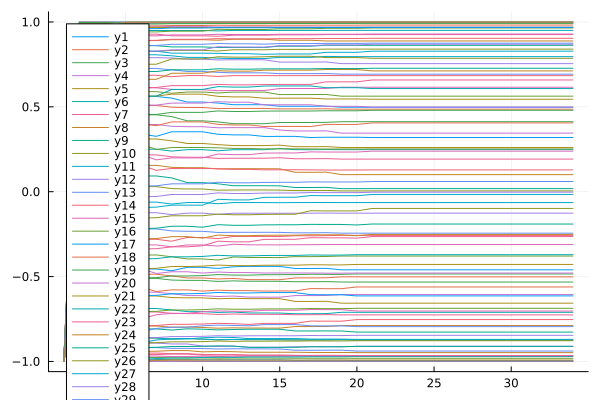

In [21]:
plot(sims_2[1,1,1:30:end,1,:])

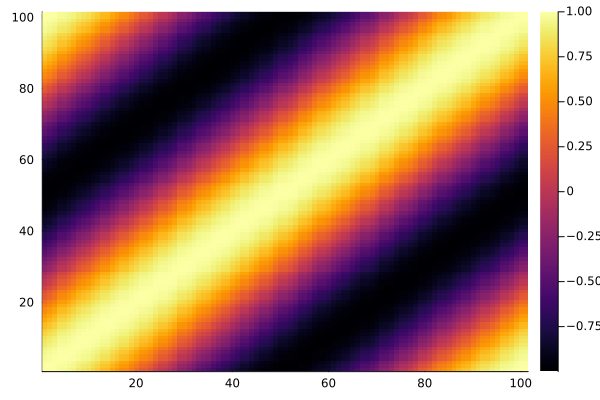

In [20]:
heatmap(sims_2[1,1,end,:,:])

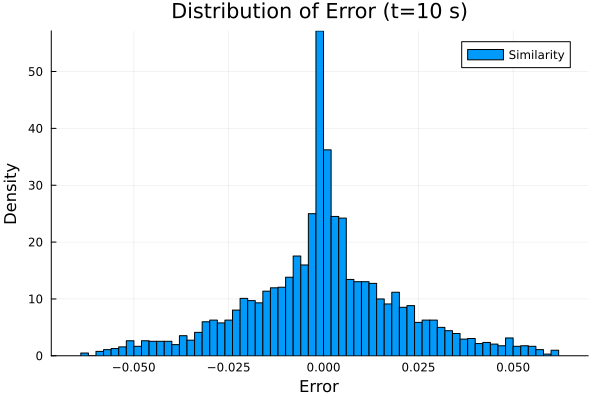

In [43]:
histogram(vec(sims_2[1,1,end,:,:] .- sims), label="Similarity", normalize=:pdf)
xlabel!("Error")
ylabel!("Density")
title!("Distribution of Error (t=10 s)")

In [31]:
errors = [mean(vec(sims_2[1,1,i,:,:] .- sims)) for i in axes(sims_2,3)]

1001-element Vector{Float64}:
 -1.0000980296049407
 -0.9695129866527517
 -0.948145093162235
 -0.9371713976315159
 -0.9260102645036019
 -0.9260169190939695
 -0.9146867705639842
 -0.9031830573266622
 -0.8796403951368118
 -0.8676347943643744
  ⋮
  4.2778988366110595e-6
  4.260759412950797e-6
  4.257928121917197e-6
  4.272324244154055e-6
  4.269998387889639e-6
  4.275314637589594e-6
  4.270431284445e-6
  4.270365449159862e-6
  4.270324391429457e-6

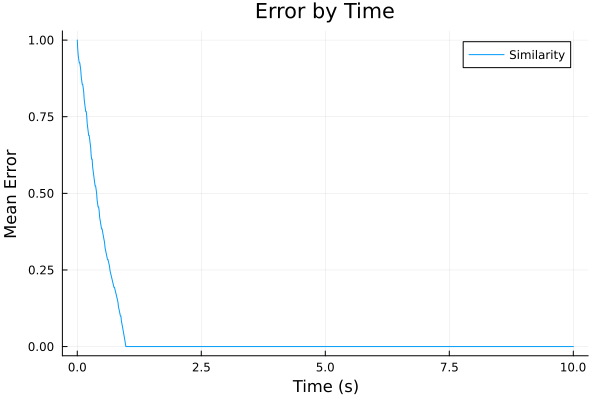

In [44]:
plot(0:0.01:10, abs.(errors), label="Similarity")
ylabel!("Mean Error")
xlabel!("Time (s)")
title!("Error by Time")

In [6]:
phase_x = random_symbols((n_vsa, 1));

In [7]:
phase_z = random_symbols((n_vsa, 3));

In [8]:
phase_xp = random_symbols((n_vsa, 1));

In [9]:
phase_y = reduce(hcat, collect(range(start=phase_x, stop=phase_xp, length=n_y)));

In [10]:
sims = similarity(phase_x, phase_y)

1×10 Matrix{Float64}:
 1.0  0.961611  0.853221  0.693595  …  0.065888  0.0047556  -0.013237

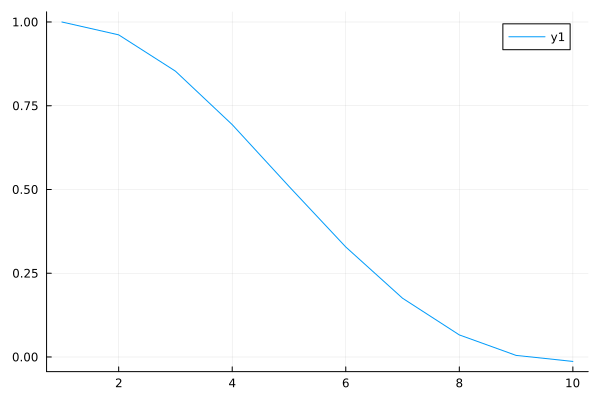

In [11]:
plot(sims |> vec)

In [12]:
similarity_self(phase_z, 2)

1×3×3 Array{Float64, 3}:
[:, :, 1] =
 1.0  -0.0223828  0.00467365

[:, :, 2] =
 -0.0223828  1.0  0.0315101

[:, :, 3] =
 0.00467365  0.0315101  1.0

In [ ]:
st_x = phase_to_train(phase_x, spk_args, repeats = repeats)
st_y = phase_to_train(phase_y, spk_args, repeats = repeats)

Spike Train: (512, 10) with 30720 spikes.

In [16]:
using OrdinaryDiffEq

In [17]:
sa = SpikingArgs()

Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.02 (V)


In [18]:
function similarity(x::SpikeTrain, y::SpikeTrain, dim::Int = 1; tspan::Tuple{<:Real, <:Real} = (0.0, 10.0), spk_args::SpikingArgs = default_spk_args(), return_solution::Bool = false)
    sol_x = phase_memory(x, tspan = tspan, spk_args = spk_args)
    sol_y = phase_memory(y, tspan = tspan, spk_args = spk_args)

    
    u_x = normalize_potential.(Array(sol_x))
    u_y = normalize_potential.(Array(sol_y))

    interference = u_x .+ u_y
    magnitude = clamp.(abs.(interference), 0.0, 2.0)
    half_angle = acos.(0.5 .* magnitude)
    sim = cos.(2.0 .* half_angle)
    avg_sim = mean(sim, dims=dim)
    
    return avg_sim

end

similarity (generic function with 3 methods)

In [19]:
sim = similarity(st_x, st_y, 1, tspan=tspan, spk_args=sa, return_solution=true);

In [20]:
sim

1×10×601 Array{Float64, 3}:
[:, :, 1] =
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0

[:, :, 2] =
 -0.957031  -0.986328  -0.986328  …  -0.988281  -0.987305  -0.978516

[:, :, 3] =
 -0.925781  -0.972658  -0.974609  …  -0.974616  -0.971687  -0.964844

;;; … 

[:, :, 599] =
 1.0  0.961085  0.85204  0.691923  …  0.0656402  0.00527369  -0.012873

[:, :, 600] =
 1.0  0.96107  0.852012  0.69189  …  0.0656426  0.00528372  -0.0128958

[:, :, 601] =
 1.0  0.961047  0.851973  0.691844  …  0.0656409  0.00528843  -0.0128995

In [21]:
sim |> size

(1, 10, 601)

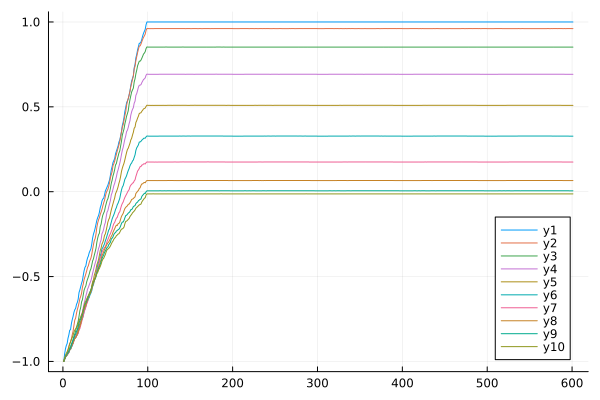

In [22]:
plot(sim[1,:,:]')

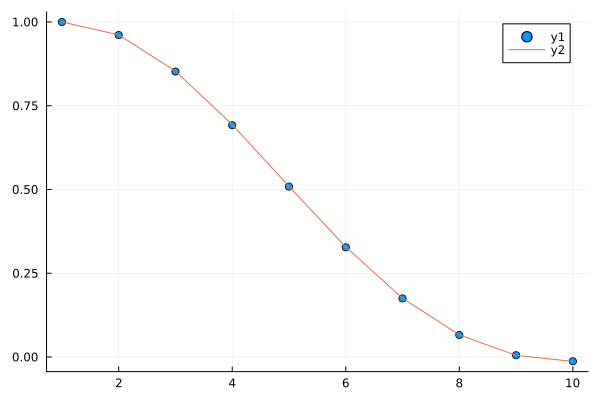

In [23]:
scatter(sim[1,:,end])
plot!(sims |> vec)

In [24]:
spk_sim = sim[1,:,end]

10-element Vector{Float64}:
  0.9999999683350331
  0.9610471370921649
  0.8519726173343136
  0.6918441552196789
  0.508650481623056
  0.32738948291300696
  0.1747629498774072
  0.06564085418411421
  0.00528843025936188
 -0.012899495518742716

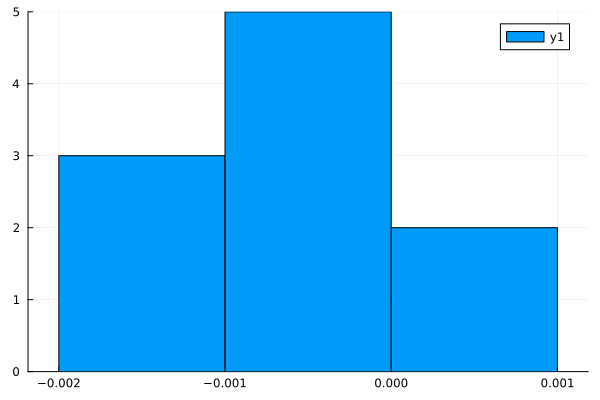

In [25]:
error = spk_sim .- vec(sims)
histogram(error)